# Imports

In [319]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.mixture import GaussianMixture as GMM
import seaborn as sns

# Question 1

In [2]:
sq_data = pd.read_excel('sqData.xlsx') # import the data set

In [3]:
sq_data

,x,y
0,52.4491,285480.69
1,33.6676,-156453.07
2,20.9333,58117.67
3,79.0828,930768.05
4,66.6792,799101.01
...,...,...
495,70.2134,796544.80
496,34.9008,-158688.29
497,46.7066,392.61
498,38.8534,-79630.27


## a

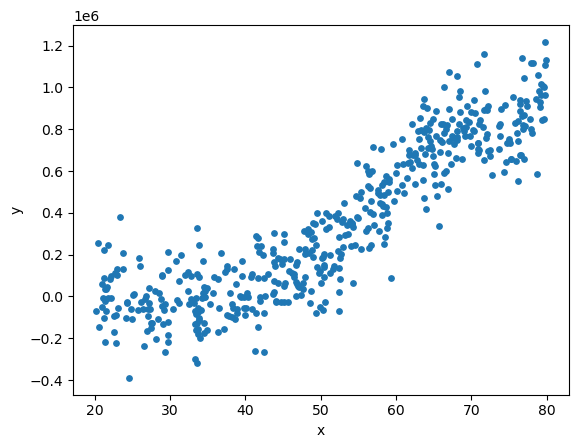

In [95]:
# draw a scatter plot of the data
x = sq_data['x'].values
y = sq_data['y'].values
plt.scatter(x, y, s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Q1_a.png')
plt.show()

## b

In [35]:
# set up cubic regression model
cubic = PolynomialFeatures(degree=3, include_bias=False)
x_cubic = x.reshape(-1, 1)
x_cubic = cubic.fit_transform(x_cubic)

model = LinearRegression()
model.fit(x_cubic,y)

LinearRegression()

In [42]:
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]
beta_3 = model.coef_[2]

print('beta_1: ' + str(beta_1))
print('beta_2: ' + str(beta_2))
print('beta_3: ' + str(beta_3))

beta_1: -116757.24650124542
beta_2: 2595.3795596854784
beta_3: -15.367256988816575


In [37]:
beta_0 = model.intercept_
print(beta_0)

1514186.9605761967


In [89]:
# get model values for entire range of x values
x_range = np.array(range(int(x_min), int(x_max)+1, 1))
x_range_cubic = x_range.reshape(-1,1)
cubic = PolynomialFeatures(degree=3, include_bias=False)
x_range_cubic = cubic.fit_transform(x_range_cubic)
y_predicted = model.predict(x_range_cubic)

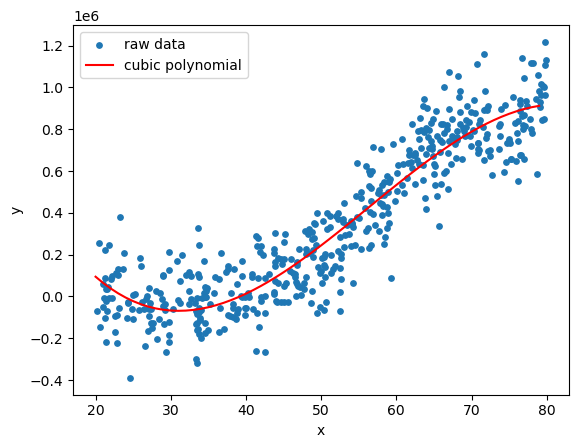

In [96]:
# overlay in scatter plot
x = sq_data['x'].values
y = sq_data['y'].values
plt.scatter(x, y, s=15, label='raw data')
plt.plot(range(int(x_min), int(x_max)+1, 1), y_predicted, color='r', label='cubic polynomial')
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Q1_b_cubic.png')
plt.show()

In [100]:
# predict expected value
x_for_prediction = 70.5
cubic_value = np.array([x_for_prediction, x_for_prediction**2, x_for_prediction**3]).reshape(1,-1)
predicted_value = model.predict(cubic_value)
print(predicted_value)

[797759.15083422]


## c

In [109]:
# Trasform values using the basis function
y = sq_data['y'].to_list()
x = sq_data['x'].to_list()
x_2 = [i**2 for i in x]
x_3 = [i**3 for i in x]
x_h_1 = [(i-30)**3 if i>30 else 0 for i in x]
x_h_2 = [(i-50)**3 if i>50 else 0 for i in x]
x_h_3 = [(i-68)**3 if i>68 else 0 for i in x]

In [113]:
# create df of values
train_values = pd.DataFrame(list(zip(x, x_2, x_3, x_h_1, x_h_2, x_h_3, y)), 
                            columns=['x', 'x_2', 'x_3', 'x_h_1', 'x_h_2', 'x_h_3', 'y'])

In [114]:
train_values

,x,x_2,x_3,x_h_1,x_h_2,x_h_3,y
0,52.4491,2750.908091,144282.653546,11313.495373,14.689924,0.000000,285480.69
1,33.6676,1133.507290,38162.470029,49.333950,0.000000,0.000000,-156453.07
2,20.9333,438.203049,9173.035883,0.000000,0.000000,0.000000,58117.67
3,79.0828,6254.089256,494590.889802,118246.416776,24598.501426,1361.283210,930768.05
4,66.6792,4446.115713,296463.438826,49346.864689,4640.081930,0.000000,799101.01
...,...,...,...,...,...,...,...
495,70.2134,4929.921540,346146.553026,65029.794465,8258.822092,10.843756,796544.80
496,34.9008,1218.065841,42511.472291,117.706633,0.000000,0.000000,-158688.29
497,46.7066,2181.506484,101890.750725,4662.987205,0.000000,0.000000,392.61
498,38.8534,1509.586692,58652.575562,693.953321,0.000000,0.000000,-79630.27


In [115]:
# split features and target
X = train_values.drop(['y'], axis=1)
y = train_values['y'].to_list()

In [118]:
# start regression
spline_model = LinearRegression()
spline_model.fit(X, y)

LinearRegression()

In [327]:
beta_1 = spline_model.fit(X, y).coef_[0]
beta_2 = spline_model.fit(X, y).coef_[1]
beta_3 = spline_model.fit(X, y).coef_[2]
beta_4 = spline_model.fit(X, y).coef_[3]
beta_5 = spline_model.fit(X, y).coef_[4]
beta_6 = spline_model.fit(X, y).coef_[5]

print('beta_1: ' + str(beta_1))
print('beta_2: ' + str(beta_2))
print('beta_3: ' + str(beta_3))
print('beta_4: ' + str(beta_4))
print('beta_5: ' + str(beta_5))
print('beta_6: ' + str(beta_6))

beta_1: -452291.70737884444
beta_2: 15563.900203846804
beta_3: -176.61584039505692
beta_4: 208.7726348900481
beta_5: -113.34682710645596
beta_6: 392.26645948049173


In [121]:
beta_0 = spline_model.intercept_
print(beta_0)

4302363.738677701


In [124]:
# overlay spline model on previous scatter plot
# get model values for entire range of x values
x_range = list(range(int(x_min), int(x_max)+1, 1))
x_2_r = [i**2 for i in x_range]
x_3_r = [i**3 for i in x_range]
x_h_1_r = [(i-30)**3 if i>30 else 0 for i in x_range]
x_h_2_r = [(i-50)**3 if i>50 else 0 for i in x_range]
x_h_3_r = [(i-68)**3 if i>68 else 0 for i in x_range]

In [127]:
# create df of range values
range_values = pd.DataFrame(list(zip(x_range, x_2_r, x_3_r, x_h_1_r, x_h_2_r, x_h_3_r)), 
                            columns=['x', 'x_2', 'x_3', 'x_h_1', 'x_h_2', 'x_h_3'])

In [128]:
# get predicted values
y_pred_spline = spline_model.predict(range_values)

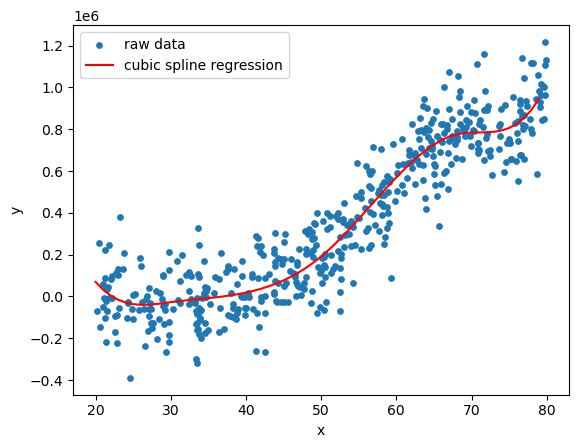

In [130]:
# overlay in scatter plot
x = sq_data['x'].values
y = sq_data['y'].values
plt.scatter(x, y, s=15, label='raw data')
plt.plot(range(int(x_min), int(x_max)+1, 1), y_pred_spline, color='r', label='cubic spline regression')
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Q1_c_cubic_spline.png')
plt.show()

In [131]:
# predict value
x_value = 70.5
if x_value > 30:
    x_value_h_1 = (x_value-30)**3
else:
    x_value_h_1 = 0
    
if x_value > 50:
    x_value_h_2 = (x_value-50)**3
else:
    x_value_h_2 = 0
    
if x_value > 68:
    x_value_h_3 = (x_value-68)**3
else:
    x_value_h_3 = 0
    
spline_value = np.array([x_value, x_value**2, x_value**3, x_value_h_1, x_value_h_2, x_value_h_3]).reshape(1,-1)

In [132]:
predicted_spline_value = spline_model.predict(spline_value)
print(predicted_spline_value)

[784043.57750889]


C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## d

In [160]:
# RSS

In [154]:
y_pred_poly = model.predict(x_cubic)
RSS_cubic_poly = 0
for (i,j) in list(zip(y, y_pred_poly)):
    RSS_cubic_poly += (i-j)**2
    
print('Residual sum of squares value for cubic polynomial regression: ' + str(RSS_cubic_poly))

Residual sum of squares value for cubic polynomial regression: 9301844636005.79


In [155]:
y_spline = spline_model.predict(X)
RSS_cubic_spline = 0
for (i,j) in list(zip(y, y_spline)):
    RSS_cubic_spline += (i-j)**2
    
print('Residual sum of squares value for cubic spline regression: ' + str(RSS_cubic_spline))

Residual sum of squares value for cubic spline regression: 8491345092836.346


In [161]:
# R squared

In [163]:
R_2_poly = r2_score(y, y_pred_poly)
print('R squared score for cubic polynomial regression: ' + str(R_2_poly))

R squared score for cubic polynomial regression: 0.8638516961403622


In [164]:
R_2_spline = r2_score(y, y_spline)
print('R squared score for cubic spline regression: ' + str(R_2_spline))

R squared score for cubic spline regression: 0.87571473432253


# Question 2

In [165]:
# import the data
lda_data = pd.read_excel('LDAData.xlsx')

In [166]:
lda_data

,gr,x1,x2
0,1,90.535,102.132
1,1,96.539,101.255
2,1,102.514,93.208
3,1,104.786,105.752
4,1,95.393,100.954
...,...,...,...
1245,2,106.853,97.280
1246,2,117.282,101.348
1247,2,113.571,104.436
1248,2,104.225,104.792


In [167]:
# split data into based on categories
lda_data_1 = lda_data[lda_data['gr'] == 1]
lda_data_2 = lda_data[lda_data['gr'] == 2]

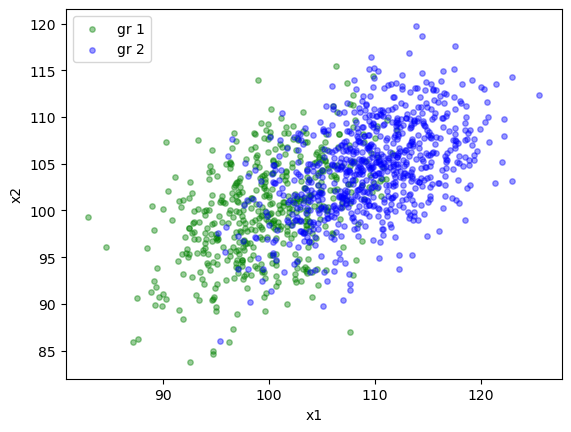

In [172]:
# construc scatter plot
x_1_1 = lda_data_1['x1'].values
y_1_1 = lda_data_1['x2'].values
plt.scatter(x_1_1, y_1_1, s=15, c='green', label='gr 1', alpha=0.4)

x_1_2 = lda_data_2['x1'].values
y_1_2 = lda_data_2['x2'].values
plt.scatter(x_1_2, y_1_2, s=15, c='blue', label='gr 2', alpha=0.4)

plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Q2_a.png')
plt.show()

## b

In [183]:
# set up model
X_lda = lda_data.drop(['gr'], axis=1)
y_lda = lda_data['gr'].values

lda_clf = LinearDiscriminantAnalysis(store_covariance=True)
lda_clf.fit(X_lda, y_lda)

LinearDiscriminantAnalysis(store_covariance=True)

In [201]:
# get parameters
classes = [lda_clf.classes_[0], lda_clf.classes_[1]]
means = [lda_clf.means_[0], lda_clf.means_[1]]
priors = [lda_clf.priors_[0], lda_clf.priors_[1]]

In [230]:
cov_matrix = lda_clf.covariance_
cov_matrix

array([[27.16328814, 12.56817792],
       [12.56817792, 26.4884024 ]])

In [229]:
means

[array([99.951464, 99.96655 ]), array([109.64744   , 104.50078667])]

In [203]:
pd.DataFrame(list(zip(classes, means, priors)), columns=['class label', 'class mean', 'class prior'])

,class label,class mean,class prior
0,1,"[99.95146400000013, 99.96654999999998]",0.4
1,2,"[109.64743999999996, 104.50078666666654]",0.6


In [220]:
lda_clf.coef_

array([[0.35530763, 0.00231846]])

In [211]:
# k = 1
coef_11 = means[0][0]/cov_matrix[0][0] + means[0][1]/cov_matrix[0][1]
coef_12 = means[0][0]/cov_matrix[0][1] + means[0][1]/cov_matrix[1][1]

print('coef_1: ' + str(coef_11))
print('coef_2: ' + str(coef_12))

coef_1: 11.633593953761586
coef_2: 11.726715317981341


In [215]:
# k = 2
coef_21 = means[1][0]/cov_matrix[0][0] + means[1][1]/cov_matrix[0][1]
coef_22 = means[1][0]/cov_matrix[0][1] + means[1][1]/cov_matrix[1][1]

print('coef_1: ' + str(coef_21))
print('coef_2: ' + str(coef_22))

coef_1: 12.351316640312113
coef_2: 12.669363804670422


In [233]:
# classify data using model
y_pred_lda = lda_clf.predict(X_lda)

In [239]:
lda_result_df = X_lda.copy()
lda_result_df['gr'] = y_pred_lda

lda_pred_data_1 = lda_result_df[lda_result_df['gr'] == 1]
lda_pred_data_2 = lda_result_df[lda_result_df['gr'] == 2]

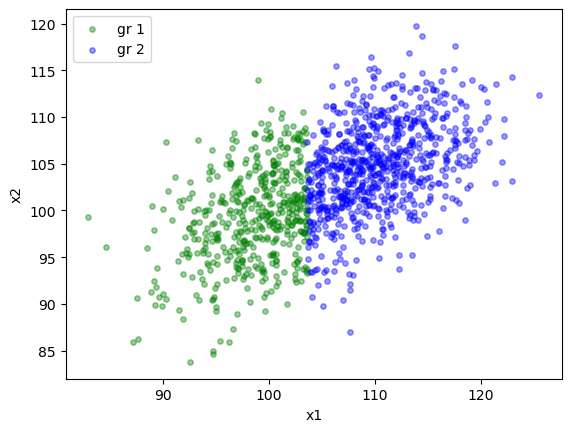

In [241]:
# create scatter plot
x_1_1_res = lda_pred_data_1['x1'].values
y_1_1_res = lda_pred_data_1['x2'].values
plt.scatter(x_1_1_res, y_1_1_res, s=15, c='green', label='gr 1', alpha=0.4)

x_1_2_res = lda_pred_data_2['x1'].values
y_1_2_res = lda_pred_data_2['x2'].values
plt.scatter(x_1_2_res, y_1_2_res, s=15, c='blue', label='gr 2', alpha=0.4)

plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Q2_b_scatter.png')
plt.show()

In [260]:
cm_0_5 = confusion_matrix(y_lda, y_pred_lda, labels=lda_clf.classes_)

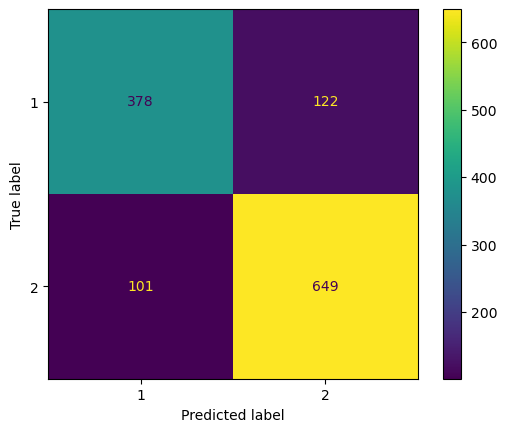

In [261]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_0_5,
                              display_labels=lda_clf.classes_)
disp.plot()

In [291]:
disp.figure_.savefig('confusion_matrix_0_5.png')

In [286]:
tn, fp, fn, tp = cm_0_5.ravel()
tn, fp, fn, tp

(378, 122, 101, 649)

In [264]:
sens_0_5 = tp/(tp+fn)
print('sensitivity at a tolerance of 0.5: ' + str(sens_0_5))

sensitivity at a tolerance of 0.5: 0.8653333333333333


In [265]:
spec_0_5 = tn/(tn+fp)
print('specificity at a tolerance of 0.5: ' + str(spec_0_5))

specificity at a tolerance of 0.5: 0.756


In [287]:
acc_0_5 = (tp+tn)/(tp+tn+fp+fn)
print('accuarcy at a tolerance of 0.5: ' + str(acc_0_5))

accuarcy at a tolerance of 0.5: 0.8216


In [266]:
# 0.2 tolerance

In [271]:
lda_prob = lda_clf.predict_proba(X_lda)

In [272]:
lda_prob

array([[0.9906505 , 0.0093495 ],
       [0.92634165, 0.07365835],
       [0.60527632, 0.39472368],
       ...,
       [0.028549  , 0.971451  ],
       [0.44836244, 0.55163756],
       [0.00426392, 0.99573608]])

In [275]:
y_pred_lda_0_2 = [2 if i[1] >= 0.2 else 1 for i in lda_prob]

In [277]:
cm_0_2 = confusion_matrix(y_lda, y_pred_lda_0_2, labels=lda_clf.classes_)

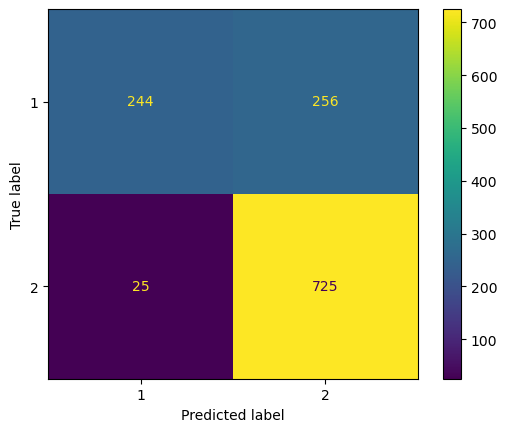

In [279]:
disp_0_2 = ConfusionMatrixDisplay(confusion_matrix=cm_0_2,
                              display_labels=lda_clf.classes_)
disp_0_2.plot()

In [290]:
disp_0_2.figure_.savefig('confusion_matrix_0_2.png')

In [280]:
tn, fp, fn, tp = cm_0_2.ravel()
tn, fp, fn, tp

(244, 256, 25, 725)

In [281]:
sens_0_2 = tp/(tp+fn)
print('sensitivity at a tolerance of 0.2: ' + str(sens_0_2))

sensitivity at a tolerance of 0.2: 0.9666666666666667


In [283]:
spec_0_2 = tn/(tn+fp)
print('specificity at a tolerance of 0.2: ' + str(spec_0_2))

specificity at a tolerance of 0.2: 0.488


In [285]:
acc_0_2 = (tp+tn)/(tp+tn+fp+fn)
print('accuarcy at a tolerance of 0.2: ' + str(acc_0_2))

accuarcy at a tolerance of 0.2: 0.7752


In [288]:
lda_result_df_0_2 = X_lda.copy()
lda_result_df_0_2['gr'] = y_pred_lda_0_2

lda_pred_data_1_tol = lda_result_df_0_2[lda_result_df_0_2['gr'] == 1]
lda_pred_data_2_tol = lda_result_df_0_2[lda_result_df_0_2['gr'] == 2]

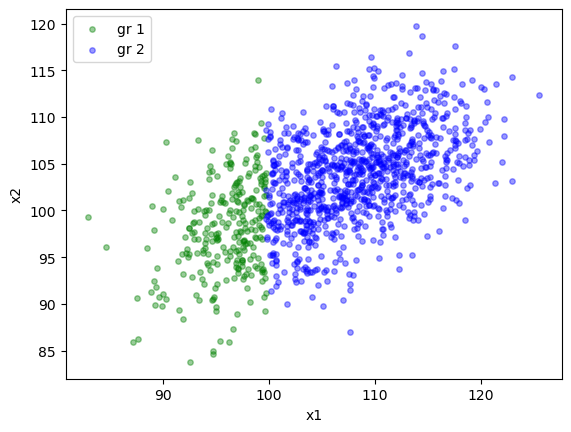

In [289]:
# create scatter plot
x_1_1_res_tol = lda_pred_data_1_tol['x1'].values
y_1_1_res_tol = lda_pred_data_1_tol['x2'].values
plt.scatter(x_1_1_res_tol, y_1_1_res_tol, s=15, c='green', label='gr 1', alpha=0.4)

x_1_2_res_tol_tol = lda_pred_data_2_tol['x1'].values
y_1_2_res_tol = lda_pred_data_2_tol['x2'].values
plt.scatter(x_1_2_res_tol_tol, y_1_2_res_tol, s=15, c='blue', label='gr 2', alpha=0.4)

plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Q2_b_scatter_tol_0_2.png')
plt.show()

# Question 3

In [292]:
# import data
modb_df = pd.read_excel('ModBData.xlsx')

In [293]:
modb_df

,x1,x2
0,78.648,87.289
1,82.604,86.084
2,87.638,81.156
3,87.168,87.393
4,81.921,86.071
...,...,...
3095,96.927,107.373
3096,98.367,104.613
3097,102.346,105.546
3098,100.803,105.112


# a

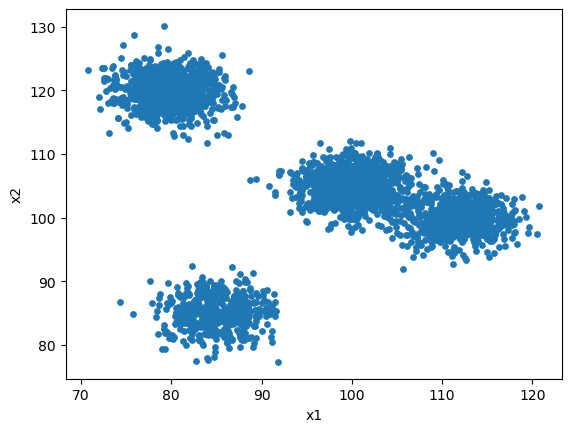

In [294]:
# draw a scatter plot of the data
x_1 = modb_df['x1'].values
x_2 = modb_df['x2'].values
plt.scatter(x_1, x_2, s=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Q3_a.png')
plt.show()

# b

In [301]:
# set random state
random_state = 42

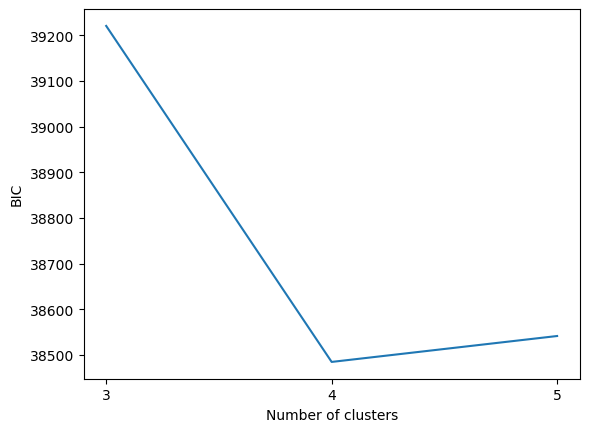

In [304]:
# set up bic graph for cluster perfomrance evaluation
n_components = np.arange(3,6)
gmm_models = [GMM(n, random_state=random_state).fit(modb_df) for n in n_components]
plt.plot(n_components, [model.bic(modb_df) for model in gmm_models])
plt.xticks(range(3,6))
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.savefig('Q3_b_bic.png')
plt.show()

## c

In [305]:
# formulate best model, clusters = 4
gmm_best = GMM(4, random_state=random_state)
gmm_best.fit(modb_df)

GaussianMixture(n_components=4, random_state=42)

In [310]:
gmm_weights = gmm_best.weights_
weights

array([0.22623681, 0.29032255, 0.16129032, 0.32215031])

In [311]:
gmm_means = gmm_best.means_
gmm_means

array([[111.80922815,  99.82016714],
       [ 79.797336  , 119.93001296],
       [ 84.97421   ,  84.98866   ],
       [100.06086411, 104.94834445]])

In [313]:
gmm_cov_matrices = gmm_best.covariances_
gmm_cov_matrices

array([[[ 9.35459875e+00,  2.91580542e-01],
        [ 2.91580542e-01,  5.50493370e+00]],

       [[ 8.60080883e+00, -4.73902801e-01],
        [-4.73902801e-01,  6.16003134e+00]],

       [[ 9.01915502e+00,  2.45372621e-03],
        [ 2.45372621e-03,  6.69160383e+00]],

       [[ 9.34563730e+00,  6.18278791e-02],
        [ 6.18278791e-02,  6.15162067e+00]]])

## d

In [314]:
# classify the training data
labels = gmm_best.predict(modb_df)

In [316]:
clustered_df = modb_df.copy()
clustered_df['labels'] = labels

In [317]:
clustered_df

,x1,x2,labels
0,78.648,87.289,2
1,82.604,86.084,2
2,87.638,81.156,2
3,87.168,87.393,2
4,81.921,86.071,2
...,...,...,...
3095,96.927,107.373,3
3096,98.367,104.613,3
3097,102.346,105.546,3
3098,100.803,105.112,3


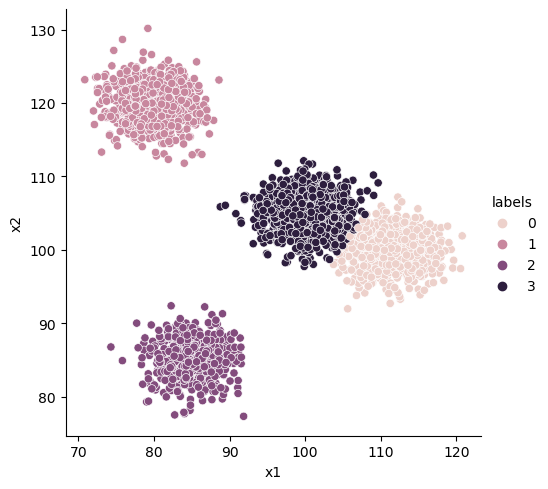

In [320]:
# plot clusters
scatter_plot = sns.relplot(data=clustered_df, x='x1', y='x2', hue='labels')
scatter_plot.set(xlabel = 'x1', ylabel = 'x2')
plt.savefig('Q3_d.png')
plt.show()

## e

In [322]:
value_to_cluster = np.array([83.5, 93.8])

In [325]:
# get probabilities
gmm_best.predict_proba(value_to_cluster.reshape(1,-1))

C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


array([[1.28153267e-17, 5.19140755e-22, 9.99999984e-01, 1.61751754e-08]])